<a href="https://colab.research.google.com/github/azzbc7819/test_igaimers/blob/develop/%EA%B2%B0%EC%B8%A1%EA%B0%92_%ED%8F%89%EA%B7%A0_%EB%8C%80%EC%B2%B4_RandomForest.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd

In [2]:
trainfile = '/content/drive/MyDrive/LG Aimers 해커톤/train.csv'
df = pd.read_csv(trainfile)
df.head()

#데이터 로드

,PRODUCT_ID,Y_Class,Y_Quality,TIMESTAMP,LINE,PRODUCT_CODE,X_1,X_2,X_3,X_4,...,X_2866,X_2867,X_2868,X_2869,X_2870,X_2871,X_2872,X_2873,X_2874,X_2875
0,TRAIN_000,1,0.533433,2022-06-13 5:14,T050304,A_31,NaN,NaN,NaN,NaN,...,39.34,40.89,32.56,34.09,77.77,NaN,NaN,NaN,NaN,NaN
1,TRAIN_001,2,0.541819,2022-06-13 5:22,T050307,A_31,NaN,NaN,NaN,NaN,...,38.89,42.82,43.92,35.34,72.55,NaN,NaN,NaN,NaN,NaN
2,TRAIN_002,1,0.531267,2022-06-13 5:30,T050304,A_31,NaN,NaN,NaN,NaN,...,39.19,36.65,42.47,36.53,78.35,NaN,NaN,NaN,NaN,NaN
3,TRAIN_003,2,0.537325,2022-06-13 5:39,T050307,A_31,NaN,NaN,NaN,NaN,...,37.74,39.17,52.17,30.58,71.78,NaN,NaN,NaN,NaN,NaN
4,TRAIN_004,1,0.531590,2022-06-13 5:47,T050304,A_31,NaN,NaN,NaN,NaN,...,38.70,41.89,46.93,33.09,76.97,NaN,NaN,NaN,NaN,NaN


In [3]:
columns_to_drop = ['PRODUCT_ID', 'TIMESTAMP','Y_Class', 'Y_Quality', 'X_3', 'X_4', 'X_6', 'X_10', 'X_14', 'X_19', 'X_23', 'X_25', 'X_26', 'X_27', 'X_28', 'X_29', 'X_30', 'X_31', 'X_32', 'X_33', 'X_34', 'X_35', 'X_36', 'X_37', 'X_67', 'X_68', 'X_69', 'X_70', 'X_71', 'X_72', 'X_74', 'X_75', 'X_76', 'X_77', 'X_78', 'X_79', 'X_80', 'X_81', 'X_82', 'X_83', 'X_84', 'X_85', 'X_89', 'X_91', 'X_92', 'X_93', 'X_96', 'X_100', 'X_104', 'X_108', 'X_112', 'X_116', 'X_122', 'X_130', 'X_131', 'X_135', 'X_142', 'X_145', 'X_147', 'X_154', 'X_158', 'X_162', 'X_166', 'X_170', 'X_174', 'X_178', 'X_182', 'X_186', 'X_187', 'X_188', 'X_190', 'X_191', 'X_192', 'X_193', 'X_194', 'X_195', 'X_232', 'X_234', 'X_235', 'X_239', 'X_241', 'X_244', 'X_249', 'X_252', 'X_255', 'X_259', 'X_260', 'X_264', 'X_274', 'X_278', 'X_282', 'X_312', 'X_313', 'X_314', 'X_315', 'X_316', 'X_317', 'X_319', 'X_322', 'X_323', 'X_324', 'X_325', 'X_326', 'X_327', 'X_328', 'X_329', 'X_330', 'X_334', 'X_336', 'X_337', 'X_338', 'X_339', 'X_340', 'X_342', 'X_343', 'X_347', 'X_351', 'X_355', 'X_359', 'X_360', 'X_361', 'X_362', 'X_363', 'X_369', 'X_371', 'X_372', 'X_375', 'X_376', 'X_377', 'X_378', 'X_381', 'X_382', 'X_383', 'X_390', 'X_391', 'X_392', 'X_409', 'X_410', 'X_411', 'X_424', 'X_425', 'X_426', 'X_427', 'X_429', 'X_430', 'X_431', 'X_432', 'X_433', 'X_434', 'X_466', 'X_467', 'X_480', 'X_487', 'X_503', 'X_505', 'X_508', 'X_512', 'X_519', 'X_551', 'X_558', 'X_561', 'X_567', 'X_583', 'X_617', 'X_620', 'X_631', 'X_633', 'X_634', 'X_636', 'X_638', 'X_639', 'X_640', 'X_641', 'X_642', 'X_650', 'X_672', 'X_673', 'X_676', 'X_691', 'X_692', 'X_695', 'X_699', 'X_715', 'X_729', 'X_732', 'X_743', 'X_749', 'X_759', 'X_760', 'X_761', 'X_764', 'X_776', 'X_777', 'X_778', 'X_836', 'X_843', 'X_844', 'X_849', 'X_859', 'X_872', 'X_873', 'X_874', 'X_879', 'X_880', 'X_881', 'X_886', 'X_887', 'X_888', 'X_889', 'X_910', 'X_912', 'X_934', 'X_935', 'X_936', 'X_937', 'X_950', 'X_951', 'X_952', 'X_969', 'X_970', 'X_971', 'X_987', 'X_988', 'X_989', 'X_992', 'X_1003', 'X_1004', 'X_1005', 'X_1006', 'X_1007', 'X_1008', 'X_1020', 'X_1021', 'X_1022', 'X_1023', 'X_1024', 'X_1025', 'X_1070', 'X_1092', 'X_1103', 'X_1119', 'X_1130', 'X_1137', 'X_1146', 'X_1157', 'X_1206', 'X_1216', 'X_1219', 'X_1248', 'X_1249', 'X_1250', 'X_1251', 'X_1252', 'X_1253', 'X_1255', 'X_1293', 'X_1298', 'X_1309', 'X_1311', 'X_1312', 'X_1314', 'X_1316', 'X_1317', 'X_1318', 'X_1319', 'X_1320', 'X_1328', 'X_1361', 'X_1362', 'X_1363', 'X_1364', 'X_1367', 'X_1392', 'X_1393', 'X_1394', 'X_1395', 'X_1396', 'X_1399', 'X_1407', 'X_1426', 'X_1457', 'X_1487', 'X_1502', 'X_1503', 'X_1504', 'X_1522', 'X_1523', 'X_1524', 'X_1525', 'X_1531', 'X_1537', 'X_1540', 'X_1571', 'X_1572', 'X_1573', 'X_1574', 'X_1575', 'X_1576', 'X_1577', 'X_1578', 'X_1579', 'X_1580', 'X_1581', 'X_1582', 'X_1644', 'X_1645', 'X_1675', 'X_1676', 'X_1677', 'X_1680', 'X_1681', 'X_1683', 'X_1684', 'X_1685', 'X_1687', 'X_1688', 'X_1689', 'X_1691', 'X_1692', 'X_1693', 'X_1695', 'X_1698', 'X_1699', 'X_1700', 'X_1701', 'X_1702', 'X_1707', 'X_1708', 'X_1709', 'X_1710', 'X_1711', 'X_1719', 'X_1721', 'X_1722', 'X_1723', 'X_1724', 'X_1729', 'X_1731', 'X_1733', 'X_1749', 'X_1753', 'X_1754', 'X_1759', 'X_1760', 'X_1765', 'X_1766', 'X_1771', 'X_1772', 'X_1777', 'X_1778', 'X_1783', 'X_1784', 'X_1789', 'X_1790', 'X_1795', 'X_1796', 'X_1801', 'X_1802', 'X_1803', 'X_1807', 'X_1808', 'X_1811', 'X_1823', 'X_1827', 'X_1828', 'X_1835', 'X_1836', 'X_1837', 'X_1838', 'X_1839', 'X_1840', 'X_1841', 'X_1842', 'X_1844', 'X_1845', 'X_1846', 'X_1847', 'X_1848', 'X_1851', 'X_1852', 'X_1869', 'X_1870', 'X_1871', 'X_1872', 'X_1969', 'X_1970', 'X_1971', 'X_1972', 'X_1973', 'X_1974', 'X_1975', 'X_1976', 'X_1977', 'X_1978', 'X_1979', 'X_1980', 'X_1981', 'X_1982', 'X_1983', 'X_1984', 'X_1985', 'X_1986', 'X_1987', 'X_1988', 'X_1989', 'X_1990', 'X_1991', 'X_1992', 'X_1993', 'X_1994', 'X_1995', 'X_1996', 'X_1997', 'X_1998', 'X_1999', 'X_2000', 'X_2001', 'X_2002', 'X_2003', 'X_2004', 'X_2005', 'X_2006', 'X_2007', 'X_2008', 'X_2009', 'X_2010', 'X_2011', 'X_2012', 'X_2013', 'X_2014', 'X_2015', 'X_2016', 'X_2029', 'X_2030', 'X_2031', 'X_2032', 'X_2033', 'X_2034', 'X_2035', 'X_2036', 'X_2037', 'X_2038', 'X_2039', 'X_2040', 'X_2052', 'X_2053', 'X_2054', 'X_2055', 'X_2069', 'X_2077', 'X_2085', 'X_2092', 'X_2188', 'X_2189', 'X_2417', 'X_2419', 'X_2420', 'X_2425', 'X_2462', 'X_2540', 'X_2541', 'X_2542', 'X_2545', 'X_2548', 'X_2549', 'X_2550', 'X_2551', 'X_2628', 'X_2629', 'X_2630', 'X_2631', 'X_2632', 'X_2633', 'X_2634', 'X_2635', 'X_2636', 'X_2637', 'X_2638', 'X_2639', 'X_2640', 'X_2641', 'X_2642', 'X_2643', 'X_2644', 'X_2645', 'X_2646', 'X_2647', 'X_2648', 'X_2649', 'X_2650', 'X_2651', 'X_2652', 'X_2653', 'X_2654', 'X_2655', 'X_2656', 'X_2657', 'X_2658', 'X_2659', 'X_2660', 'X_2661', 'X_2662', 'X_2663', 'X_2664', 'X_2665', 'X_2666', 'X_2667', 'X_2668', 'X_2669', 'X_2670', 'X_2671', 'X_2672', 'X_2673', 'X_2674', 'X_2675', 'X_2676', 'X_2677', 'X_2678', 'X_2679', 'X_2680', 'X_2681', 'X_2682', 'X_2683', 'X_2684', 'X_2685', 'X_2686', 'X_2687', 'X_2688', 'X_2689', 'X_2690', 'X_2691', 'X_2692', 'X_2693', 'X_2694', 'X_2695', 'X_2696', 'X_2697', 'X_2698', 'X_2699', 'X_2721', 'X_2722', 'X_2723', 'X_2730', 'X_2732', 'X_2733', 'X_2738', 'X_2773', 'X_2774', 'X_2775', 'X_2838', 'X_2844', 'X_2871', 'X_2872', 'X_2873', 'X_2874', 'X_2875']

x_data = df.drop(columns = columns_to_drop)
y_data = df.pop('Y_Class')

In [4]:
from sklearn.preprocessing import LabelEncoder

In [5]:
#말그대로 범주형 데이터 > 수치형 데이터로 전환
qual_col = ['LINE', 'PRODUCT_CODE']

for i in qual_col:
    le = LabelEncoder()
    le = le.fit(x_data[i])
    x_data[i] = le.transform(x_data[i])



In [6]:
x_data.head()

,LINE,PRODUCT_CODE,X_1,X_2,X_5,X_7,X_8,X_9,X_11,X_12,...,X_2861,X_2862,X_2863,X_2864,X_2865,X_2866,X_2867,X_2868,X_2869,X_2870
0,2,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,197.286667,189.0,383.0,368.296296,353.0,39.34,40.89,32.56,34.09,77.77
1,3,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,193.296552,185.6,383.0,367.735849,353.0,38.89,42.82,43.92,35.34,72.55
2,2,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,179.820690,165.5,383.0,367.320755,353.0,39.19,36.65,42.47,36.53,78.35
3,3,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,181.920690,165.8,384.0,369.188679,353.0,37.74,39.17,52.17,30.58,71.78
4,2,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,196.393333,182.6,383.0,367.351852,352.0,38.70,41.89,46.93,33.09,76.97


In [7]:
print(x_data.shape)
print(y_data.shape)

(598, 2325)
(598,)


In [8]:
print(type(x_data))
print(type(y_data))

<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.series.Series'>


In [9]:
x_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 598 entries, 0 to 597
Columns: 2325 entries, LINE to X_2870
dtypes: float64(2323), int64(2)
memory usage: 10.6 MB


In [10]:
for columns_name in x_data:
  x_data.fillna({columns_name : x_data[columns_name].mean() }, inplace=True)
  #print(x_data[columns_name].mean())

#x데이터 결측값 각 열별 평균으로 초기화

In [11]:
x_data.head()

,LINE,PRODUCT_CODE,X_1,X_2,X_5,X_7,X_8,X_9,X_11,X_12,...,X_2861,X_2862,X_2863,X_2864,X_2865,X_2866,X_2867,X_2868,X_2869,X_2870
0,2,0,2.409742,95.123209,10.39255,48.802292,10.048711,41.469914,497.050716,503.401433,...,197.286667,189.0,383.0,368.296296,353.0,39.34,40.89,32.56,34.09,77.77
1,3,0,2.409742,95.123209,10.39255,48.802292,10.048711,41.469914,497.050716,503.401433,...,193.296552,185.6,383.0,367.735849,353.0,38.89,42.82,43.92,35.34,72.55
2,2,0,2.409742,95.123209,10.39255,48.802292,10.048711,41.469914,497.050716,503.401433,...,179.820690,165.5,383.0,367.320755,353.0,39.19,36.65,42.47,36.53,78.35
3,3,0,2.409742,95.123209,10.39255,48.802292,10.048711,41.469914,497.050716,503.401433,...,181.920690,165.8,384.0,369.188679,353.0,37.74,39.17,52.17,30.58,71.78
4,2,0,2.409742,95.123209,10.39255,48.802292,10.048711,41.469914,497.050716,503.401433,...,196.393333,182.6,383.0,367.351852,352.0,38.70,41.89,46.93,33.09,76.97


In [12]:
import numpy as np

In [13]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split( # 주어진 학습 데이터의 20%를 validation data set으로 분리
    x_data,
    y_data,
    test_size = 0.2,
    random_state = 0,
    stratify = y_data
)

print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

(478, 2325) (478,)
(120, 2325) (120,)


In [16]:
!pip install lazypredict

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [17]:
from lazypredict.Supervised import LazyClassifier # lazypredict 설치 방법 : pip install lazypredict

clf = LazyClassifier(verbose = 0, predictions=True)

models, predictions = clf.fit(x_train, x_test, y_train, y_test) # fit(학습 데이터 인풋, 테스트 데이터 인풋, 학습 데이터 아웃풋, 테스트 데이터 아웃풋)

models

100%|██████████| 29/29 [00:41<00:00,  1.43s/it]


,Accuracy,Balanced Accuracy,ROC AUC,F1 Score,Time Taken
Model,,,,,
PassiveAggressiveClassifier,0.72,0.65,None,0.73,0.53
LinearSVC,0.71,0.63,None,0.71,3.03
SGDClassifier,0.77,0.61,None,0.75,0.21
Perceptron,0.72,0.60,None,0.71,0.23
BaggingClassifier,0.77,0.59,None,0.75,2.10
DecisionTreeClassifier,0.68,0.59,None,0.68,1.61
LGBMClassifier,0.77,0.57,None,0.74,7.64
BernoulliNB,0.66,0.57,None,0.67,0.12
RandomForestClassifier,0.78,0.57,None,0.75,0.57


In [18]:
testfile = '/content/drive/MyDrive/LG Aimers 해커톤_팀/data/test.csv'

test_df = pd.read_csv(testfile)

columns_to_drop.remove('Y_Class')
columns_to_drop.remove('Y_Quality')

test_x = test_df.drop(columns = columns_to_drop)

#test 데이터 불러오기

In [19]:
qual_col = ['LINE', 'PRODUCT_CODE']

for i in qual_col:
    le = LabelEncoder()
    le = le.fit(test_x[i])
    test_x[i] = le.transform(test_x[i])

In [20]:
test_x.head()

,LINE,PRODUCT_CODE,X_1,X_2,X_5,X_7,X_8,X_9,X_11,X_12,...,X_2861,X_2862,X_2863,X_2864,X_2865,X_2866,X_2867,X_2868,X_2869,X_2870
0,5,2,2.00,94.00,10.00,51.00,10.00,52.00,469.60,474.40,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,4,2,2.00,93.00,11.00,45.00,10.00,31.00,506.60,511.10,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,4,2,2.00,95.00,11.00,45.00,10.00,31.00,506.60,511.40,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,191.45,183.80,467.00,444.19,423.00,NaN,NaN,NaN,NaN,NaN
4,1,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,193.08,179.70,465.00,443.21,423.00,NaN,NaN,NaN,NaN,NaN


In [21]:
test_x = test_x.fillna(0)

In [22]:
test_x.isnull().sum()

#널 값 없음

LINE            0
PRODUCT_CODE    0
X_1             0
X_2             0
X_5             0
               ..
X_2866          0
X_2867          0
X_2868          0
X_2869          0
X_2870          0
Length: 2325, dtype: int64

In [23]:
print(test_x.shape)
print(x_train.shape)

(310, 2325)
(478, 2325)


In [24]:
from sklearn.ensemble import RandomForestClassifier

# 모델 학습
model_rf = RandomForestClassifier(n_estimators=5, random_state=0)
model_rf.fit(x_train, y_train)

# 평가
print("훈련 세트 정확도 : {:.3f}".format(model_rf.score(x_train, y_train)))

훈련 세트 정확도 : 0.971


In [25]:
pred_rf = model_rf.predict(test_x)

In [26]:
pred_rf

array([1, 0, 1, 0, 0, 2, 0, 0, 1, 2, 0, 0, 2, 0, 0, 0, 1, 1, 1, 1, 0, 1,
       1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 2, 0, 2, 0, 2, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 2, 0,
       0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 2, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 2,
       2, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1,
       0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1,
       1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 0, 0, 2, 2, 2, 2, 0, 1, 0, 1, 0, 2, 0, 1, 2,
       1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 2, 2, 2, 2, 2, 2,
       2, 0, 0, 1, 0, 1, 2, 2, 1, 0, 1, 1, 0, 0, 0,

In [27]:
submission_rf = pd.read_csv('/content/drive/MyDrive/LG Aimers 해커톤_팀/data/sample_submission.csv')

submission_rf['Y_Class'] = pred_rf

In [ ]:
#submission_rf.to_csv('/content/drive/MyDrive/LG Aimers 해커톤_팀/data/rf_submission_1.csv', index=False)

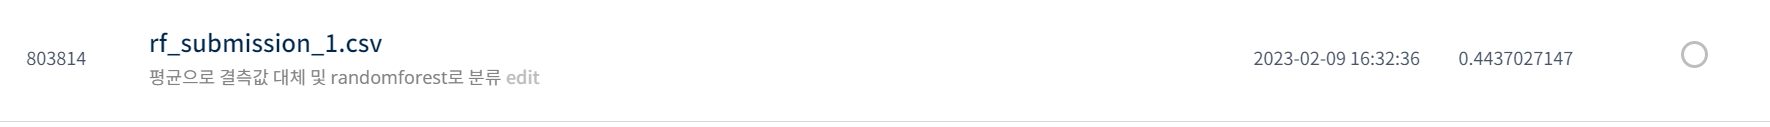

test 데이터 적용 시 정확률 44% 정도

하지만 이 모델은 train_test_split으로 주어진 train 중 일부 데이터만 훈련시킬 때 사용하였음.

In [28]:
##위는 실제 주어진 test 데이터로 예측해보았을 때

##아래 코드는 위에서 분류하였던 test_x로 해보자

print("테스트 세트 정확도: {:.3f}".format(model_rf.score(x_test, y_test)) )

#train 데이터에서 일부를 test 데이터로 돌리고 나서 성능을 체크할 때와 실제 test 데이터 제출 시 나타나는 성능 차이가 큼

테스트 세트 정확도: 0.708


In [30]:
# 모델 학습
model_rf2 = RandomForestClassifier(n_estimators=100, random_state=0) #n_estimators는 트리의 개수, 숫자가 클수록 배깅하는 모델 많아지는 것
model_rf2.fit(x_train, y_train)

# 평가
print("훈련 세트 정확도 : {:.3f}".format(model_rf2.score(x_train, y_train)))
print("테스트 세트 정확도: {:.3f}".format(model_rf2.score(x_test, y_test)) )

훈련 세트 정확도 : 1.000
테스트 세트 정확도: 0.767
